In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()


In [4]:
class_names=["T-shirts","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

# Data Reshape   
in ANN we flatten the input but in CNN we have to convert it into 3D array as input (height,width,no. of channel)
we have 60,000

In [5]:
x_train_full=x_train_full.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))

# Data normalization:
we normalise the data dimensions so that they are of approximately of the same scale
also as there are 255 pixel in grey scale image .hence we divide by 255 so as to get value between 0-1

In [9]:
x_train_n=x_train_full/255
x_test_n=x_test/255

# now  we are spliting the data into train/validation/test dataset
training data- used for training the data 
Validation data - used for tuning the hyperparameters and evaluate the models
test data- used to test the model after the model has gone through initial vetting by the validation set.


In [10]:
x_vaid,x_train= x_train_n[:5000],x_train_n[5000:]
y_vaid,y_train=y_train_full[:5000],y_train_full[5000:]
x_test=x_test_n

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

# Model Architecture

In [13]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [18]:
model_history=model.fit(x_train,y_train,epochs=30,batch_size=64,
                       validation_data=(x_vaid,y_vaid))

Epoch 1/30
860/860 [==============================] - 57s 58ms/step - loss: 1.1969 - accuracy: 0.6164 - val_loss: 0.7372 - val_accuracy: 0.7286
Epoch 2/30
860/860 [==============================] - 46s 54ms/step - loss: 0.5617 - accuracy: 0.7967 - val_loss: 0.4845 - val_accuracy: 0.8228
Epoch 3/30
860/860 [==============================] - 46s 54ms/step - loss: 0.4916 - accuracy: 0.8214 - val_loss: 0.8826 - val_accuracy: 0.7038
Epoch 4/30
860/860 [==============================] - 46s 54ms/step - loss: 0.4528 - accuracy: 0.8379 - val_loss: 0.4141 - val_accuracy: 0.8588
Epoch 5/30
860/860 [==============================] - 47s 55ms/step - loss: 0.4321 - accuracy: 0.8445 - val_loss: 0.4224 - val_accuracy: 0.8508
Epoch 6/30
860/860 [==============================] - 43s 50ms/step - loss: 0.3960 - accuracy: 0.8561 - val_loss: 0.3732 - val_accuracy: 0.8714
Epoch 7/30
860/860 [==============================] - 38s 44ms/step - loss: 0.3784 - accuracy: 0.8652 - val_loss: 0.4115 - val_accuracy:

In [21]:
model.save("my_fashion_mnist_trained_model.h5")

In [22]:
%pwd


'C:\\Users\\Janvi'

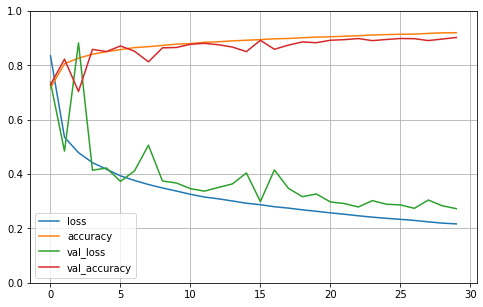

In [23]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [24]:
eva=model.evaluate(x_test_n,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.2814 - accuracy: 0.8997


In [26]:
 eva

[0.2813540995121002, 0.8996999859809875]

In [27]:
x_new =x_test[:5]

In [28]:
y_pred=model.predict_classes(x_new)
y_pred

C:\Users\Janvi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1, 1, 6], dtype=int64)

In [29]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

AxesImage(54,36;334.8x217.44)


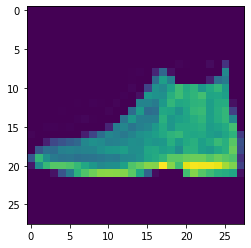

In [36]:
print(plt.imshow(x_test[0].reshape((28,28))))

In [38]:
keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session()>

In [39]:
del model